In [1]:
!python --version

Python 3.6.5


In [626]:
__author__ = "José Fernando Pérez Pérez"
__info__ = "Proyecto Final del curso Ciencia de datos con Python"
__email__ = "josefernando.perez@galileo.edu"

In [268]:
# Importamos las librerías permitidas para la realización del proyecto
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import random
sns.set(style="whitegrid")

## Procesamiento inicial del conjunto de datos
Se leerán los datos de un archivo ".npy" que es un fichero que contiene datos compatibles con numpy. También se realizara la divisón de los datos en 2 subconjuntos quedando distribuidos de la siguiente manera:

| Subconjunto          | Proporción del conjunto original |
| -------------------- | -------------------------------- |
| Entrenamiento        | 80%                              |
| Validación y pruebas | 20%                              |

## Descripción del conjunto de datos

| No | Nombre Columna | Descripción | Dimensional |
| -- | -------------- | ----------- | ----------- |
| 0  | SalePrice      | Precio de la casa. Objetivo de predicción, **Y**.| $ |
| 1  | OverallQual    | Calidad de los materiales y acabados de la construcción. Escala de 1 - 10, donde 10 es lo mejor. | -- |
| 2  | 1stFlrSF       | Metros cuadrados de construcción en primer nivel. | mts<sup>2</sup> |
| 3  | TotRmsAbvGrd   | Habitaciones con un grado alto. Excluyendo los baños. | -- |
| 4  | YearBuilt      | Año de construcción | -- |
| 5  | LotFrontAge    | Medida de largo de casa conectado a la calle. | ft |


In [106]:
# Nombres de las columnas
data_columns = {0: "SalePrice", 
                    1: "OverallQual", 
                    2: "1stFlrSF", 
                    3: "TotRmsAbvGrd", 
                    4: "YearBuilt", 
                    5: "LotFrontAge"}

In [107]:
# Mostrar las dimensiones de un conjunto de datos
def print_dimensions(data_title, data):
    print(f"{data_title}".center(30, "-"))
    print(f"Cantidad de filas: {data.shape[0]}")
    print(f"Cantidad de columnas: {data.shape[1]}")
    print("".center(30,"-"))

# Función que retorna el conjunto de datos de entrenamiento y validación
def data_train_test_split(data, test_size=0.8):
    subset_index = int(data.shape[0] * test_size)
    return data[:subset_index,], data[subset_index:,]

In [108]:
# Cargar los datos originales y aplicar la función para separar el conjunto de entrenamiento y validación.
original_data = np.load('data/proyecto_training_data.npy')
# Replace NaN with 0.0
original_data = np.nan_to_num(original_data)
train_data, valid_data = data_train_test_split(original_data, test_size=0.8)
print_dimensions("Original", original_data)
print_dimensions("Train data", train_data)
print_dimensions("Valid data", valid_data)

-----------Original-----------
Cantidad de filas: 1460
Cantidad de columnas: 6
------------------------------
----------Train data----------
Cantidad de filas: 1168
Cantidad de columnas: 6
------------------------------
----------Valid data----------
Cantidad de filas: 292
Cantidad de columnas: 6
------------------------------


In [109]:
# Función para describir los datos en cada columna
def data_describe(data, columns_names):
    '''
    Esta función describe los datos de un arreglo multidimensional en numpy.
    Inputs:
        data -> matriz numpy de forma NxM
        columns_names -> diccionario que contiene en cada llave un entero y corresponde al número de columna de la matriz.
    Outputs:
        Se imprimen los siguientes número significativos de cada columna.
        - media
        - valor máximo
        - valor mínimo
        - rango (peak to peak)
        - desviación estandar
    '''
    for ind, column_name in columns_names.items():
        print(f"{column_name}".center(50, "-"))
        print(f"              Media: {np.mean(data[:,ind])}")
        print(f"       Valor máximo: {np.amax(data[:,ind])}")
        print(f"       Valor mínimo: {np.amin(data[:,ind])}")
        print(f"Desviación estandar: {np.std(data[:,ind])}")
        print(f"  Rango(PeakToPeak): {np.ptp(data[:,ind])}")

In [110]:
# Descripción del conjunto de datos original
data_describe(original_data, data_columns)

--------------------SalePrice---------------------
              Media: 180921.19589041095
       Valor máximo: 755000.0
       Valor mínimo: 34900.0
Desviación estandar: 79415.29188606751
  Rango(PeakToPeak): 720100.0
-------------------OverallQual--------------------
              Media: 6.0993150684931505
       Valor máximo: 10.0
       Valor mínimo: 1.0
Desviación estandar: 1.3825228366585953
  Rango(PeakToPeak): 9.0
---------------------1stFlrSF---------------------
              Media: 1162.626712328767
       Valor máximo: 4692.0
       Valor mínimo: 334.0
Desviación estandar: 386.45532230228963
  Rango(PeakToPeak): 4358.0
-------------------TotRmsAbvGrd-------------------
              Media: 6.517808219178082
       Valor máximo: 14.0
       Valor mínimo: 2.0
Desviación estandar: 1.624836553698191
  Rango(PeakToPeak): 12.0
--------------------YearBuilt---------------------
              Media: 1971.267808219178
       Valor máximo: 2010.0
       Valor mínimo: 1872.0
Desviació

## Histograma de cada variable

In [623]:
# Se utiliza la estructura de datos DataFrame de la librería de pandas para graficar con Seaborn de una forma más sencilla
df = pd.DataFrame(original_data, columns=[i for _, i in data_columns.items()])

In [262]:
# Plot distributions
def plotting_dist(data, rows, cols, names, graph_type="dist", coefs=None, y=0,size=(15,5)):
    fig, ax = plt.subplots(rows, cols, figsize=size)
    #sns.despine()
    i = 0
    for row in range(rows):
        for col in range(cols):
            if graph_type=="dist":
                sns.distplot(data[names[i]],ax=ax[row, col])
            elif graph_type=="scatter":
                if i == 5:
                    pass
                else:
                    sns.scatterplot(x=data[names[i+1]], y=data['SalePrice'], 
                                    ax=ax[row, col]).set_title("r={0:.3f}".format(coefs[i]))
            i += 1
    plt.tight_layout()

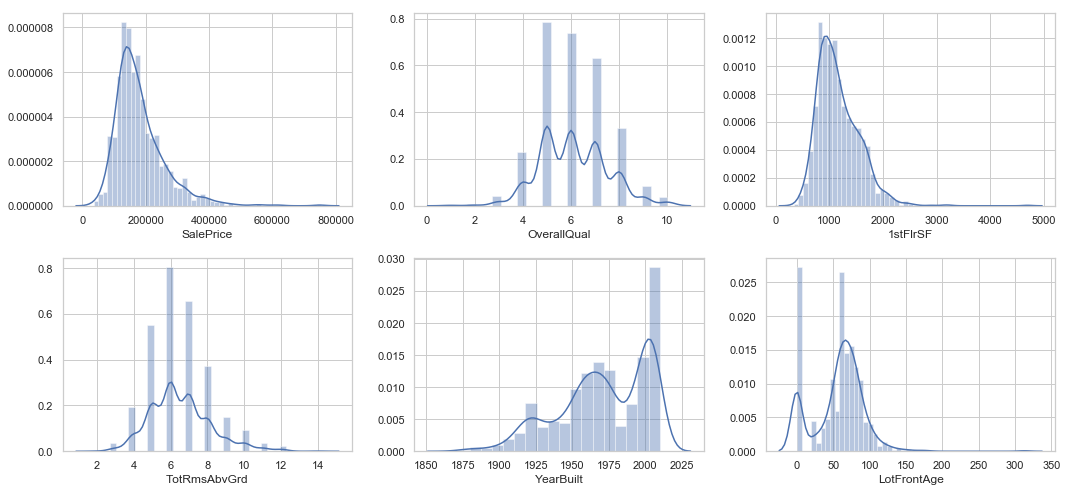

In [261]:
plotting_dist(df, 2, 3, names=data_columns, size=(15,7))

## Cálculo de correlación

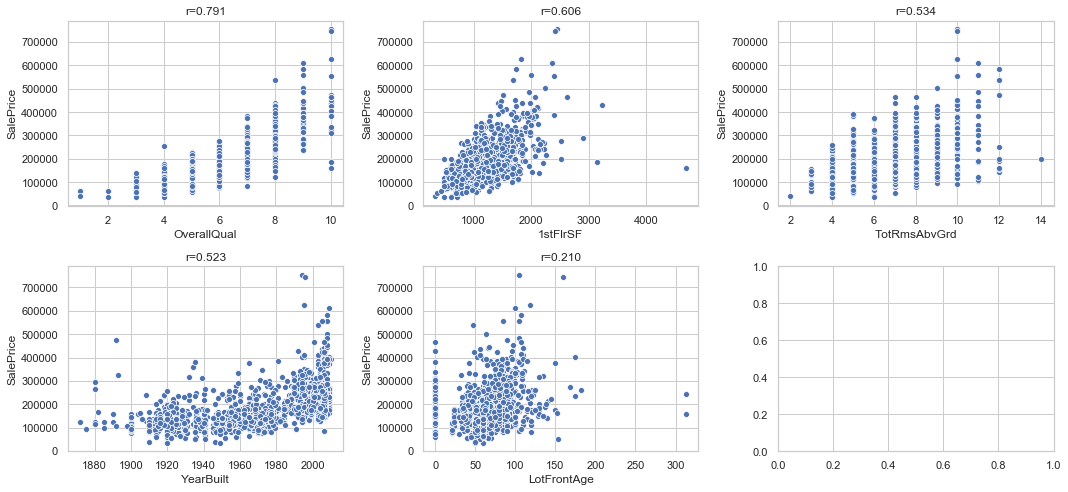

In [263]:
def correlacion(data, interest_column=0):
    columns = data.shape[1]
    coefs = []
    for i in range(1,columns):
        coefs.append(np.amin(np.corrcoef(data[:,0], data[:,i])))
    return coefs

coefs = correlacion(original_data, interest_column=0)
plotting_dist(df, 2, 3, names=data_columns, graph_type="scatter", coefs=coefs, y=0, size=(15,7))

Se seleccionan las columnas **OverallQual(1)** y **1stFlrSF(2)**.

In [622]:
# Creamos la función LinearRegression
def oLinearRegression(x, y, epochs=25, print_error_step=5, lr=0.01):
    # Inicialización de las variables
    params = np.array([1., 1.])
    errors = []
    
    for e in range(epochs):
        y_hat = predecir(params, x)
        error = funcion_costo(y_hat, y)
        errors.append(error)
        gradients = np.array( [np.mean((y_hat - y)*x), np.mean(y_hat-y)])
        params = params - lr*gradients
        if e % print_error_step == 0:
            print(f"Epoch {e}".center(30, "-"))
            print(f"Error {error}")
    return params, errors

def predecir(params, x):
    # Función utilizada para predecir el valor utilizando el modelo
    return np.matmul(params, np.vstack((x, np.ones_like(x))))

def funcion_costo(y_hat, y):
    # Función utilizanda para calcular el valor de la función de coste
    return 0.5 * np.mean((y - y_hat)**2)

In [619]:
X1 = train_data[:,1]
Y = train_data[:,0]

print("Entrenando el modelo con X1".center(100, "*"))
model1, error_history1 = oLinearRegression(X1,Y,2000,100,0.025)
print(f"Modelo 1")
print(f"m = {model1[0]}")
print(f"b = {model1[1]}")
print(f"Y_hat_m1 = {model1[0]}x + {model1[1]}")

************************************Entrenando el modelo con X1*************************************
-----------Epoch 0------------
Error 19408353541.431507
----------Epoch 100-----------
Error 1342496384.676301
----------Epoch 200-----------
Error 1301246246.225611
----------Epoch 300-----------
Error 1268696243.1915426
----------Epoch 400-----------
Error 1243011415.520372
----------Epoch 500-----------
Error 1222743817.6400511
----------Epoch 600-----------
Error 1206750892.5911732
----------Epoch 700-----------
Error 1194131062.0059514
----------Epoch 800-----------
Error 1184172900.9120336
----------Epoch 900-----------
Error 1176315032.1631017
----------Epoch 1000----------
Error 1170114479.6019318
----------Epoch 1100----------
Error 1165221695.9105446
----------Epoch 1200----------
Error 1161360857.3780859
----------Epoch 1300----------
Error 1158314314.7320335
----------Epoch 1400----------
Error 1155910323.4705017
----------Epoch 1500----------
Error 1154013362.010596
-------

In [621]:
X2 = train_data[:,2]
print("Entrenando el modelo con X2".center(100, "*"))
model2, error_history2 = oLinearRegression(X2,Y,20,1,0.0000007)
print(f"Modelo 2")
print(f"m = {model2[0]}")
print(f"b = {model2[1]}")
print(f"Y_hat_m2 = {model2[0]}*x + {model2[1]}")

************************************Entrenando el modelo con X2*************************************
-----------Epoch 0------------
Error 19183319979.304794
-----------Epoch 1------------
Error 1987611429.2850952
-----------Epoch 2------------
Error 1968112346.8694851
-----------Epoch 3------------
Error 1968090230.1363082
-----------Epoch 4------------
Error 1968090199.3117208
-----------Epoch 5------------
Error 1968090193.5314531
-----------Epoch 6------------
Error 1968090187.779586
-----------Epoch 7------------
Error 1968090182.0277517
-----------Epoch 8------------
Error 1968090176.2759182
-----------Epoch 9------------
Error 1968090170.5240855
-----------Epoch 10-----------
Error 1968090164.7722535
-----------Epoch 11-----------
Error 1968090159.0204217
-----------Epoch 12-----------
Error 1968090153.2685914
-----------Epoch 13-----------
Error 1968090147.516762
-----------Epoch 14-----------
Error 1968090141.7649326
-----------Epoch 15-----------
Error 1968090136.0131047
-----

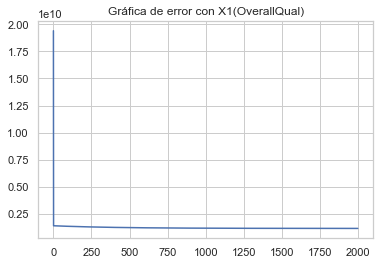

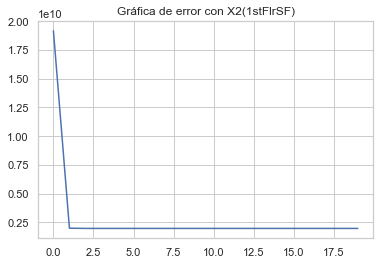

In [611]:
def plot_error(y, name):
    sns.lineplot(x=[i for i in range(len(y))], y=y).set_title(name)
    plt.show()
plot_error(error_history1, "Gráfica de error con X1(OverallQual)")
plot_error(error_history2, "Gráfica de error con X2(1stFlrSF)")

### Entrenando el modelo con Scikit-learn

In [605]:
# Utilizando X1
model1_skl = LinearRegression()
model1_skl.fit(X1.reshape(-1,1), Y)
model1_skl = np.array((model1_skl.coef_[0], model1_skl.intercept_))

#Utilizando X2
model2_skl = LinearRegression()
model2_skl.fit(X2.reshape(-1,1), Y)
model2_skl = np.array((model2_skl.coef_[0], model2_skl.intercept_))


print(f"Modelo X1 Scikit-learn \n {model1_skl}")
print(f"Modelo X2 Scikit-learn \n {model2_skl}")

Modelo X1 Scikit-learn 
 [ 45411.99877916 -96469.57131874]
Modelo X2 Scikit-learn 
 [  129.95124229 30324.58517496]


### Predicciones utilizando ambos modelos

In [578]:
def predicciones(modelo, modeloSkl, x):
    y_hat_own = predecir(modelo, x)
    y_hat_skl = predecir(modeloSkl, x)
    y_hat_prm = (y_hat_own + y_hat_skl) / 2
    return y_hat_own, y_hat_skl, y_hat_prm

In [616]:
Y_test = valid_data[:,0]
#Costo para modelo de X1
y_own1, y_skl1, y_prm1 = predicciones(model1, model1_skl, valid_data[:, 1])
costoModels1 = [funcion_costo(y_own1, Y_test), funcion_costo(y_skl1, Y_test), funcion_costo(y_prm1,Y_test)]
#Costo para modelo de X2
y_own2, y_skl2, y_prm2 = predicciones(model2, model2_skl, valid_data[:, 2])
costoModels2 = [funcion_costo(y_own2, Y_test), funcion_costo(y_skl2, Y_test), funcion_costo(y_prm2,Y_test)]

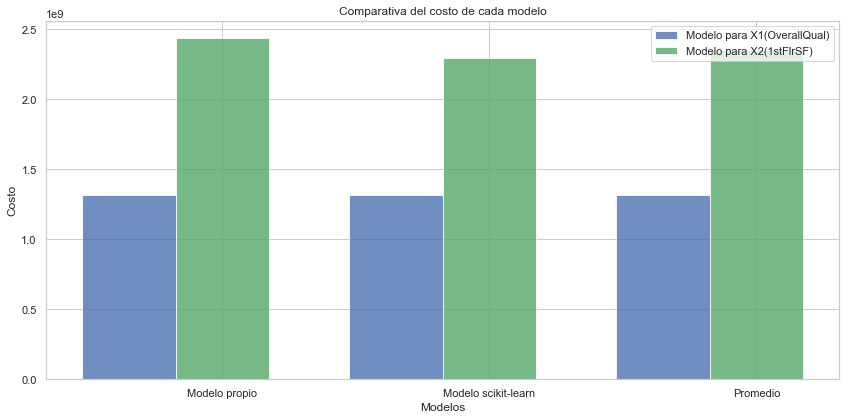

In [627]:
# Grafica de los costos evaluados para cada modelo
n_groups = 3

# create plot
fig = plt.figure(figsize=(12,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, costoModels1, bar_width,
alpha=opacity,
color='b',
label='Modelo para X1(OverallQual)')

rects2 = plt.bar(index + bar_width, costoModels2, bar_width,
alpha=opacity,
color='g',
label='Modelo para X2(1stFlrSF)')

plt.xlabel('Modelos')
plt.ylabel('Costo')
plt.title('Comparativa del costo de cada modelo')
plt.xticks(index + bar_width, ('Modelo propio', 'Modelo scikit-learn', 'Promedio'))
plt.legend()

plt.tight_layout()
plt.show()

## Conclusión
Se implementó un modelo desde cero del algoritmo de regresión lineal para una variable utilizando numpy.

Como se puede observar en la gráfica de costo, que es una comparativa de los costos relacionados al modelo utilizado se ve claramente que se obtuvo un valor de error acertado acercandose de buena manera a los obtenidos utilizando la librería scikit-learn.